In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
# MNISTデータを読込む
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(f"X_train(学習用の画像データのサイズ) : {X_train.shape}")
print(f"y_train(学習データの正解ラベルのサイズ) : {y_train.shape}")
print(f"X_test(検証用の画像データのサイズ) : {X_test.shape}")
print(f"y_test(検証データの正解ラベルのサイズ) : {y_test.shape}")

X_train(学習用の画像データのサイズ) : (60000, 28, 28)
y_train(学習データの正解ラベルのサイズ) : (60000,)
X_test(検証用の画像データのサイズ) : (10000, 28, 28)
y_test(検証データの正解ラベルのサイズ) : (10000,)


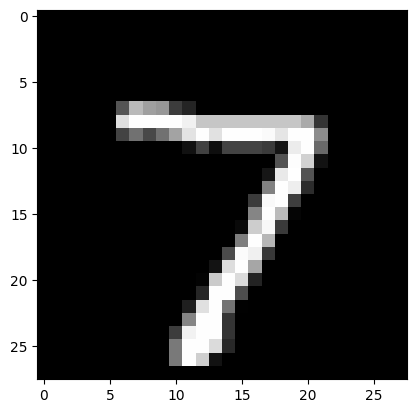

In [ ]:
import matplotlib.pyplot as plt
sample = 0
image = X_test[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
X_train  = X_train.reshape(60000, 784)
X_test   = X_test.reshape(10000, 784)
print("X_train.shape(学習用の画像データ) : ", X_train.shape)
print("y_train_shape(学習用の正解データ) : ", y_train.shape)
print("X_test.shape(検証用の画像データ) : ", X_test.shape)
print("y_test.shape(検証用の正解データ) : ", y_test.shape)

X_train.shape(学習用の画像データ) :  (60000, 784)
y_train_shape(学習用の正解データ) :  (60000,)
X_test.shape(検証用の画像データ) :  (10000, 784)
y_test.shape(検証用の正解データ) :  (10000,)


In [ ]:
# 最初にデータを小数点を含む値(float) 型に変換
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# 0-255 のデータを 0-1 の範囲に変換
X_train /= 255

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7688 - loss: 0.9480 - val_accuracy: 0.9084 - val_loss: 36.1348
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9044 - loss: 0.3502 - val_accuracy: 0.9149 - val_loss: 39.2360
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9160 - loss: 0.3047 - val_accuracy: 0.9129 - val_loss: 42.6170
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9189 - loss: 0.2914 - val_accuracy: 0.9184 - val_loss: 41.6262
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9226 - loss: 0.2760 - val_accuracy: 0.9193 - val_loss: 42.5321
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9209 - loss: 0.2839 - val_accuracy: 0.9170 - val_loss: 45.0875
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9235 - loss: 0.2723 - val_accuracy: 0.9191 - val_loss: 44.0087
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9251 - loss: 0.2710 - val_accur

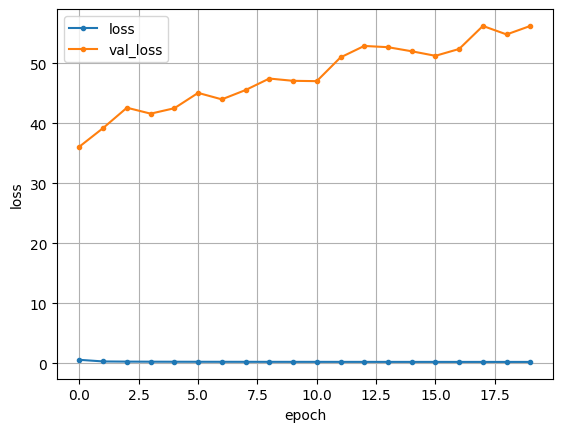

In [ ]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(f'テストデータ：loss: {score[0]}')
print(f'テストデータ：Test accuracy: {score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8857 - loss: 63.3360
テストデータ：loss: 56.247589111328125
テストデータ：Test accuracy: 0.9031000137329102
